# 1. Perkenalan 

1.1 \
Nama : Faiz Kurniawan \
Batch : RMT 018 \
\
1.2 \
Latar Belakang
<p style='text-align: justify;'> Covid-19 adalah penyakit menular yang disebabkan oleh virus SARS-CoV-2. Kebanyakan korban terjangkit akan mengalami gangguan pernafasan, dan akan sembuh dengan sendirinya tanpa penanganan intensif. Namun beberapa korban terjangkit yang memiliki penyakit bawaan seperti gangguan pernafasan, diabetes, atau kanker memiliki kemungkinan besar untuk mengalami sebuah komplikasi yang bisa berujung pada kematian. Cara terbaik mencegah dan menangani Covid-19 adalah dengan mengetahui bagaimana virus menyebar dan melindungi diri dari korban terjangkit lainnya, dan juga melakukan isolasi untuk mencegah terjadinya persebaran lebih lanjut.
 </p>



1.3 \
Problem Statement
<p style='text-align: justify;'> Berdasarkan latar belakang yang ada, peneliti ingin mengetahui data lebih lanjut mengenai Covid-19 di berbagai negara. Data-data seperti jumlah terjangkit, jumlah meninggal, dan persentase jumlah meninggal. Dengan adanya data tersebut, peneliti akan lebih mudah untuk menentukan negara mana saja yang efektif melakukan pencegahan covid, dan juga meminimalisir jumlah korban meninggal. </p>






# 2. Import Pustaka 

In [1620]:
import pandas as pd

# 3. Data Loading

In [1621]:
# Import dataset ke variable df
# Query yang digunakan di GCP adalah :
# SELECT country_region, confirmed, deaths FROM `bigquery-public-data.covid19_jhu_csse.summary`
df = pd.read_csv("h8dsft_P0GC1_faiz_kurniawan.csv")
df

,country_region,confirmed,deaths
0,US,6010,86
1,US,3870,93
2,US,2566,102
3,US,17250,294
4,US,3983,80
...,...,...,...
170378,Moldova,518793,11537
170379,Mongolia,925073,2179
170380,Namibia,166363,4038
170381,Nepal,979140,11952


In [1622]:
# Menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170383 entries, 0 to 170382
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  170383 non-null  object
 1   confirmed       170383 non-null  int64 
 2   deaths          170383 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ MB


In [1623]:
# Menampilkan deskripsi dari dataset
df.describe()

,confirmed,deaths
count,1.703830e+05,170383.000000
mean,1.236532e+05,1743.915344
std,7.534946e+05,8306.507247
min,0.000000e+00,34.000000
25%,4.525000e+03,75.000000
50%,1.100000e+04,161.000000
75%,4.327900e+04,607.000000
max,3.849501e+07,183898.000000


In [1624]:
# Menampilkan 5 data teratas dari dataset
df.head()

,country_region,confirmed,deaths
0,US,6010,86
1,US,3870,93
2,US,2566,102
3,US,17250,294
4,US,3983,80


In [1625]:
# Menampilkan 5 data terbawah dari dataset
df.tail()

,country_region,confirmed,deaths
170378,Moldova,518793,11537
170379,Mongolia,925073,2179
170380,Namibia,166363,4038
170381,Nepal,979140,11952
170382,Netherlands,37034,213


In [1626]:
# Menampilkan data acak dari dataset
df.sample()

,country_region,confirmed,deaths
65625,US,2443,47


In [1627]:
# Menampilkan jumlah data kosong masing-masing kolom dari dataset 
df.isnull().sum()

country_region    0
confirmed         0
deaths            0
dtype: int64

# 4. Data Cleaning

In [1628]:
# Grouping kolom country_region untuk mendapatkan data total alih-alih harian
# Penjumlahan value confirmed dan deaths
df = df.groupby(by='country_region').sum()
df

,confirmed,deaths
country_region,,
Afghanistan,8954049,378550
Albania,11658587,161143
Algeria,10694235,286727
Andorra,1702511,8534
Angola,5004997,100150
...,...,...
Vietnam,324589756,1604636
West Bank and Gaza,33776863,308106
Yemen,532976,100769


In [1629]:
# Pembuatan kolom baru yakni persentase meninggal
df['Persen'] = df['deaths'] / df['confirmed'] * 100
df

,confirmed,deaths,Persen
country_region,,,
Afghanistan,8954049,378550,4.227696
Albania,11658587,161143,1.382183
Algeria,10694235,286727,2.681136
Andorra,1702511,8534,0.501260
Angola,5004997,100150,2.001000
...,...,...,...
Vietnam,324589756,1604636,0.494358
West Bank and Gaza,33776863,308106,0.912181
Yemen,532976,100769,18.906855


In [1630]:
# Pencarian dan penghapusan data yang salah dimana deaths lebih banyak dari confirmed untuk menghindari invalid data
df = df[df['deaths'] < df['confirmed']]
df

,confirmed,deaths,Persen
country_region,,,
Afghanistan,8954049,378550,4.227696
Albania,11658587,161143,1.382183
Algeria,10694235,286727,2.681136
Andorra,1702511,8534,0.501260
Angola,5004997,100150,2.001000
...,...,...,...
Vietnam,324589756,1604636,0.494358
West Bank and Gaza,33776863,308106,0.912181
Yemen,532976,100769,18.906855


In [1631]:
# Penggantian nama kolom dan axis menjadi Bahasa Indonesia
df.rename_axis("Negara", inplace=True)
df.rename(columns={"confirmed" : "Terjangkit", "deaths": "Meninggal"}, inplace=True)

df

,Terjangkit,Meninggal,Persen
Negara,,,
Afghanistan,8954049,378550,4.227696
Albania,11658587,161143,1.382183
Algeria,10694235,286727,2.681136
Andorra,1702511,8534,0.501260
Angola,5004997,100150,2.001000
...,...,...,...
Vietnam,324589756,1604636,0.494358
West Bank and Gaza,33776863,308106,0.912181
Yemen,532976,100769,18.906855


# 5. Eksplorasi Data

In [1632]:
# Pembuatan variabel baru yang menampilkan jumlah korban terjangkit di semua negara
total_confirmed = int(df['Terjangkit'].sum())
print('Jumlah korban terjangkit di semua negara adalah : ', total_confirmed)

# Pembuatan variabel baru yang menampilkan jumlah korban meninggal di semua negara
total_deaths =int(df['Meninggal'].sum())
print('Jumlah korban meninggal di semua negara adalah : ', total_deaths)

# Pembuatan variabel baru yang menampilkan persentase jumlah korban meninggal di semua negara
total_deaths_percentage =float(total_deaths / total_confirmed * 100)

# Manipulasi variabel agar hanya menampilkan 2 angka di belakang koma
total_deaths_percentage = round(total_deaths_percentage, 2)
print('Persentase jumlah korban meninggal di semua negara adalah : ', total_deaths_percentage)

Jumlah korban terjangkit di semua negara adalah :  21068411289
Jumlah korban meninggal di semua negara adalah :  297133528
Persentase jumlah korban meninggal di semua negara adalah :  1.41


In [1633]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban terjangkit terbesar
highest_confirmed = df.sort_values(['Terjangkit'], ascending=False).head()
highest_confirmed['Terjangkit']

Negara
US         3484238268
India      2069388540
Brazil     1441326608
France     1101284102
Germany     894782753
Name: Terjangkit, dtype: int64

In [1634]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban terjangkit terkecil
lowest_confirmed = df.sort_values(['Terjangkit'], ascending=True).head()
lowest_confirmed['Terjangkit']

Negara
South Korea                5621
Mainland China           153212
Saint Kitts and Nevis    161336
Micronesia               177624
Sao Tome and Principe    211031
Name: Terjangkit, dtype: int64

In [1635]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban meninggal terbesar
highest_deaths = df.sort_values(['Meninggal'], ascending=False).head()
highest_deaths['Meninggal']

Negara
US        46947278
Brazil    33680212
India     26336681
Mexico    17019135
Russia    15123963
Name: Meninggal, dtype: int64

In [1636]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban meninggal terkecil
lowest_deaths = df.sort_values(['Meninggal'], ascending=True).head()
lowest_deaths['Meninggal']

Negara
South Korea                35
Micronesia                452
Saint Kitts and Nevis    1162
Dominica                 2270
Monaco                   2315
Name: Meninggal, dtype: int64

In [1637]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan persentase meninggal terbesar
highest_percentage = df.sort_values(['Persen'], ascending=False).head()
highest_percentage['Persen']

Negara
Belgium    45.741682
Yemen      18.906855
Sudan       7.425737
Mexico      6.219972
Syria       5.936907
Name: Persen, dtype: float64

In [1638]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan persentase meninggal terkecil
lowest_percentage = df.sort_values(['Persen'], ascending=True).head()
lowest_percentage['Persen']

Negara
Iceland         0.091458
Singapore       0.096776
New Zealand     0.105807
Brunei          0.123864
Korea, South    0.132492
Name: Persen, dtype: float64

In [1639]:
# Import matplotlib
%matplotlib inline

<AxesSubplot: title={'center': '5 negara  paling banyak terjangkit'}, xlabel='Negara'>

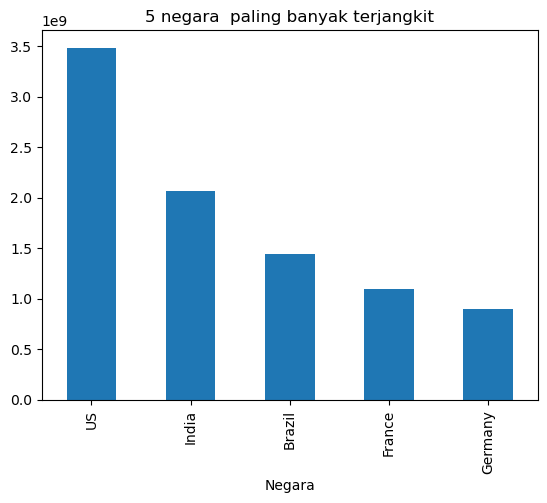

In [1640]:
# Visualisasi 5 negara dengan jumlah korban terjangkit terbesar
highest_confirmed['Terjangkit'].plot(title= '5 negara  paling banyak terjangkit', kind='bar')


<AxesSubplot: title={'center': '5 negara paling sedikit terjangkit'}, xlabel='Negara'>

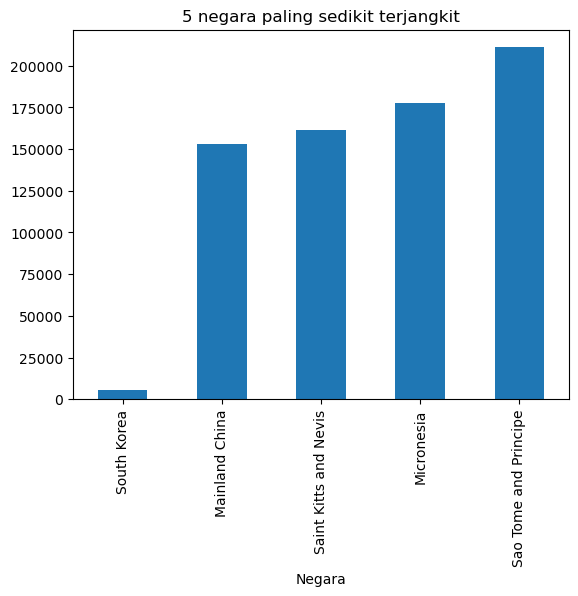

In [1641]:
# Visualisasi 5 negara dengan jumlah korban terjangkit terkecil
lowest_confirmed['Terjangkit'].plot(title='5 negara paling sedikit terjangkit', kind='bar')

<AxesSubplot: title={'center': '5 negara paling banyak meninggal'}, xlabel='Negara'>

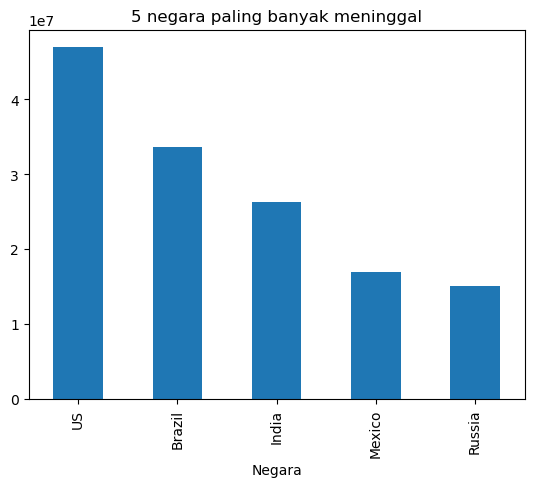

In [1642]:
# Visualisasi 5 negara dengan jumlah korban meninggal terbesar
highest_deaths['Meninggal'].plot(title='5 negara paling banyak meninggal', kind='bar')

<AxesSubplot: title={'center': '5 negara paling sedikit meninggal'}, xlabel='Negara'>

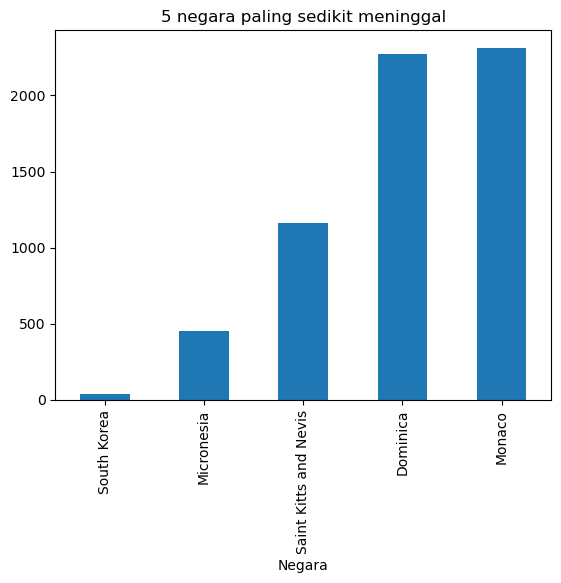

In [1643]:
# Visualisasi 5 negara dengan jumlah korban meninggal terkecil
lowest_deaths['Meninggal'].plot(title= '5 negara paling sedikit meninggal', kind='bar')

<AxesSubplot: title={'center': '5 negara paling banyak persentase meninggal'}, xlabel='Negara'>

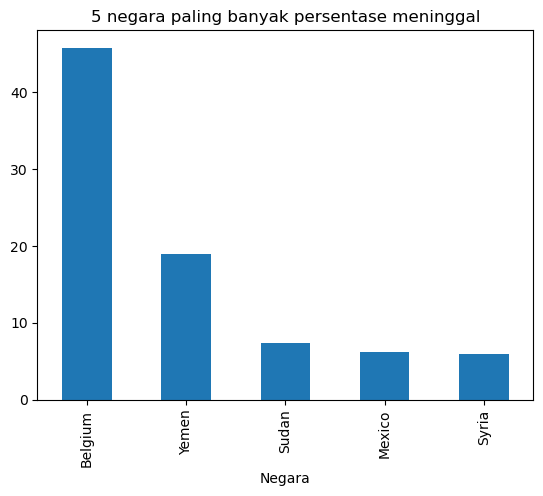

In [1644]:
# Visualisasi 5 negara dengan persentase meninggal terbesar
highest_percentage['Persen'].plot(title='5 negara paling banyak persentase meninggal', kind='bar')

<AxesSubplot: title={'center': '5 negara paling sedikit persentase meninggal'}, xlabel='Negara'>

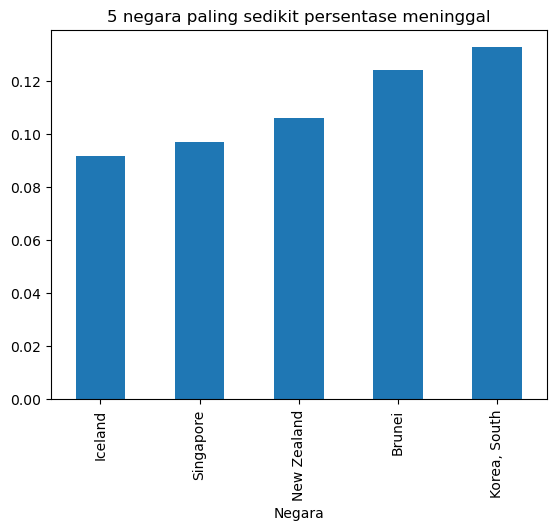

In [1645]:
# Visualisasi 5 negara dengan persentase meninggal terkecil
lowest_percentage['Persen'].plot(title='5 negara paling sedikit persentase meninggal', kind='bar')

# 6. Pengambilan Kesimpulan

Berdasarkan data yang ada, maka bisa disimpulkan bahwa :

1 . Jumlah korban terjangkit di semua negara adalah :

In [1646]:
total_confirmed

21068411289

2 . Jumlah korban meninggal di semua negara adalah :

In [1647]:
total_deaths

297133528

3 . Persentase jumlah korban meninggal di semua negara adalah :

In [1648]:
total_deaths_percentage

1.41

4 . 5 Negara dengan jumlah terjangkit terbesar adalah :

In [1649]:
highest_confirmed.index

Index(['US', 'India', 'Brazil', 'France', 'Germany'], dtype='object', name='Negara')

5 . 5 negara dengan jumlah terjangkit terkecil adalah :

In [1650]:
lowest_confirmed.index

Index(['South Korea', 'Mainland China', 'Saint Kitts and Nevis', 'Micronesia',
       'Sao Tome and Principe'],
      dtype='object', name='Negara')

6 . 5 negara dengan jumlah kematian terbesar adalah :

In [1651]:
highest_deaths.index

Index(['US', 'Brazil', 'India', 'Mexico', 'Russia'], dtype='object', name='Negara')

7 . 5 negara dengan jumlah kematian terkecil adalah :

In [1652]:
lowest_deaths.index

Index(['South Korea', 'Micronesia', 'Saint Kitts and Nevis', 'Dominica',
       'Monaco'],
      dtype='object', name='Negara')

8 . 5 Negara dengan persentase meninggal terbesar adalah :

In [1653]:
highest_percentage.index

Index(['Belgium', 'Yemen', 'Sudan', 'Mexico', 'Syria'], dtype='object', name='Negara')

9 . 5 Negara dengan persentase meninggal terkecil adalah :

In [1654]:
lowest_percentage.index

Index(['Iceland', 'Singapore', 'New Zealand', 'Brunei', 'Korea, South'], dtype='object', name='Negara')